# <center> Problem Set 6

In [1]:
import pandas as pd
import numpy as np
import patsy as pt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.tree import export_text
import matplotlib.pyplot as plt

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

df = pd.read_csv('biden.csv')

## Problem 1

In [2]:
Y = df['biden']
X = df.drop('biden', axis=1)
x, xt, y, yt = train_test_split(X, Y, test_size = 0.3, random_state=25)
X_var_names = ['female', 'age', 'educ', 'dem', 'rep']

dtree = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)
dtree_fit = dtree.fit(x, y)

### Plot the tree and interpret the results

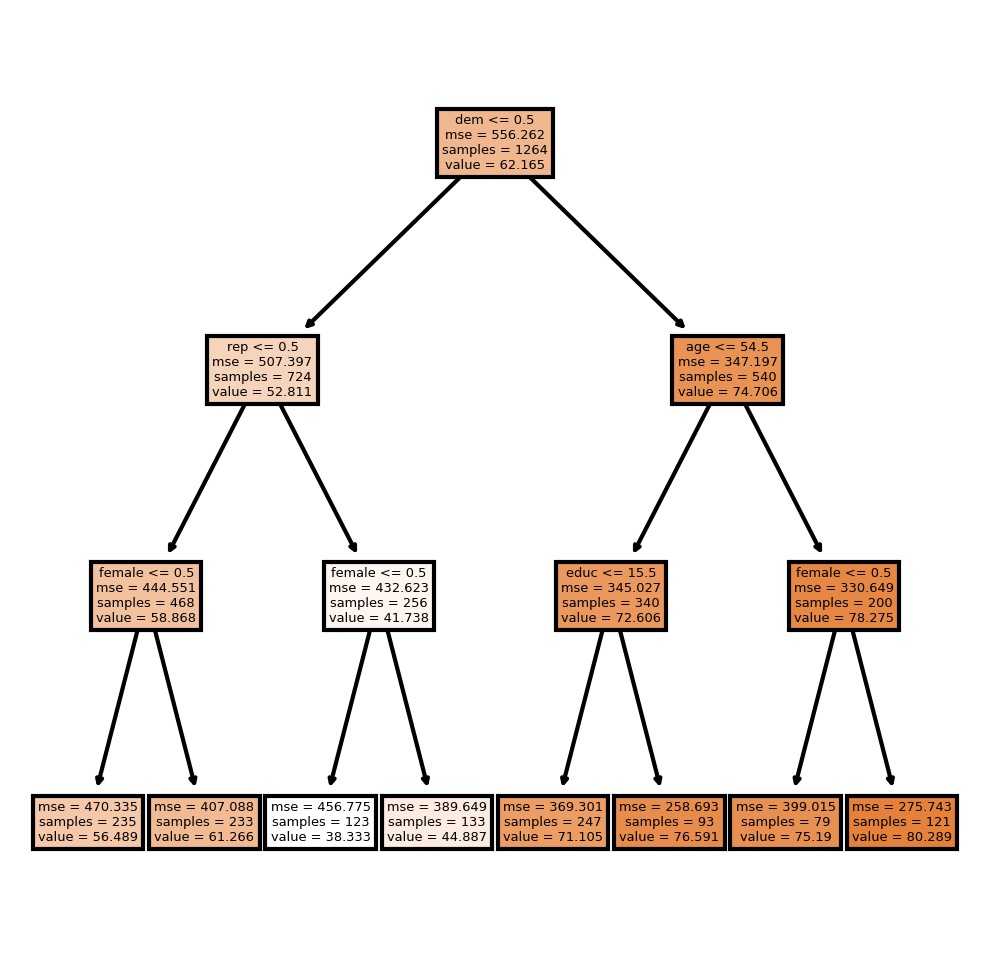

In [3]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree_fit,
           feature_names = X_var_names, 
           filled = True);

### Interpret the results

The decision tree model search across each variable for the optimal decision point, determines the information gain from that variable and decision point, and compares the information gain across the available variables. The goal of a decision tree is to find variables that return the highest information gain. 

In this decision tree, the outcome variable is biden, which indicates a feeling thermometer ranging from 0 to 100.  The darker the color of the node means the higher support for Biden. Since dem is the top node, it suggests that dem provides the highest information gain in predicting the outcome variable; the support level is also reflected by the last value in each node. It makes sense that whether a person is a democrat is more informative than other variables because Biden is from the Democrat Party.

The first row in each node represents the branch splitting rule. For example, the branch on the left side of the first node is conditional on the observations who are not democrats, and the branch on the right side of the first node is conditional on the observations who are democrats. Following the same rules, the figure suggests that for non-democrats, men have less support for Biden. For democrats, younger and more educated people have more support for Biden than younger and less educated people, and compared to older men, older women have more support for Biden.  

### What is the test MSE?

In [4]:
InRes=dtree_fit.predict(x)
OutRes=dtree_fit.predict(xt)
print("In-sample MSE: %s" % (MSE(y, InRes)))
print("Out-of-sample MSE (test MSE): %s" % (MSE(yt, OutRes)))

In-sample MSE: 390.46648050803356
Out-of-sample MSE (test MSE): 396.1937146321307


## Problem 2

In [5]:
#Set your parameter distributions over which to test random combinations to the following:
param_dist = {"max_depth": [3, 10],
              "min_samples_split": sp_randint (2, 20),
              "min_samples_leaf": sp_randint (2, 20)}

optimal_parms = RandomizedSearchCV(dtree_fit,
                                   param_dist,
                                   n_iter=100,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   cv=5,
                                   random_state=25)

### Report your optimal tuning parameter values

In [6]:
print("Optimal tuning parameter values: %s" % optimal_parms.fit(X,Y).best_params_)

Optimal tuning parameter values: {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}


### Report the MSE of your optimal results

In [7]:
print("MSE of the optimal results: %s" % optimal_parms.fit(X,Y).best_score_)

MSE of the optimal results: -401.713307249986


## Problem 3

In [11]:
forest = RandomForestRegressor(
    max_depth=3,  # set max depth of tree
    n_estimators=100,
    #max_features=3,  # number of features to consider when looking for the best split
    bootstrap=True,
    n_jobs=-1,
    oob_score=True,
    random_state=25,
    min_samples_leaf=5)

forest_fit = forest.fit(x, y)

In [12]:
InRes=forest_fit.predict(x)
OutRes=forest_fit.predict(xt)
print("In-sample MSE: %s" % (MSE(y, InRes)))
print("Out-of-sample MSE (test MSE): %s" % (MSE(yt, OutRes)))

In-sample MSE: 386.7137810198636
Out-of-sample MSE (test MSE): 393.8366919413887


In [20]:
param_dist = {"n_estimators": [10 , 200],
              "max_depth": [3, 10],
              "min_samples_split": sp_randint (2, 20),
              "min_samples_leaf": sp_randint (2, 20),
              "max_features": sp_randint (1, 5)}

optimal_parms = RandomizedSearchCV(forest_fit,
                                   param_dist,
                                   n_iter=100,
                                   n_jobs=-1,
                                   cv=5, 
                                   random_state=25, 
                                   scoring="neg_mean_squared_error")

### Report your optimal tuning parameter values

In [21]:
print("Optimal tuning parameter values: %s" % optimal_parms.fit(X,Y).best_params_)

Optimal tuning parameter values: {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10}


C:\Users\haimiti.aerfate\Softwares\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


### Report the MSE of your optimal results

In [18]:
print("MSE of the optimal results: %s" % optimal_parms.fit(X,Y).best_score_)

MSE of the optimal results: -401.713307249986
